In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import InceptionV3
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [3]:
expres_code = ['ang','dis','fea','hap','sad','sur']

In [6]:
data_path = '/content/drive/My Drive/dataset/voilajones_ck+/'
def read_data(dir_path):
    img_names = []
    img_data_list = []
    labels = []
    img_list = os.listdir(dir_path)
    for img in img_list:
        input_img = cv2.imread(dir_path + img)
        input_img=cv2.resize(input_img,(299,299))
        img_data_list.append(input_img)
        label = img[4:7]  # each name of image have 2 char for label from index 3-5
        labels.append(expres_code.index(label))
        img_names.append(img)
    img_data = np.array(img_data_list)
    print(img_data)
    return img_data, labels, img_names

X, Y, img_names = read_data(data_path)

[[[[ 17  17  17]
   [ 17  17  17]
   [ 17  17  17]
   ...
   [ 63  63  63]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 17  17  17]
   [ 17  17  17]
   [ 17  17  17]
   ...
   [ 63  63  63]
   [ 63  63  63]
   [ 63  63  63]]

  [[ 17  17  17]
   [ 17  17  17]
   [ 17  17  17]
   ...
   [ 63  63  63]
   [ 63  63  63]
   [ 63  63  63]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[ 12  12  12]
   [ 12  12  12]
   [ 12  12  12]
   ...
   [ 25  25  25]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 12  12  12]
   ...
   [ 25  25  25]
   [ 25  25  25]
   [ 25  25  25]]

  [[ 12  12  12]
   [ 12  12  12]
   [ 12  12  12]
   ...
   [ 25  25  25]
   [ 25  25  25]
   [ 25  25

In [7]:
img_x=np.array(X)
img_x = img_x.astype('float32')
img_x = img_x/255
img_x.shape

(927, 299, 299, 3)

In [8]:
labels=np.array(Y)
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4,
       4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4,
       4, 4, 4, 4, 0, 4, 0, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0,
       0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4, 4,

In [9]:
inception = InceptionV3(include_top=True, weights='imagenet')
out = Dense(6, activation='softmax', name='predictions')(inception.layers[-2].output)
inception_model = Model(inception.input, out)

for layer in inception_model.layers:
  if layer.name in ['predictions']:
      layer.trainable = True
  else:
      layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in inception_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

96116736/96112376 [==============================] - 4s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if sys.path[0] == '':


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f21a001a208>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f21a001a6d8>,conv2d_1,False
2,<keras.layers.normalization.BatchNormalization object at 0x7f21a001a940>,batch_normalization_1,False
3,<keras.layers.core.Activation object at 0x7f21a001af98>,activation_1,False
4,<keras.layers.convolutional.Conv2D object at 0x7f21a001add8>,conv2d_2,False
...,...,...,...
308,<keras.layers.merge.Concatenate object at 0x7f2135c8e940>,concatenate_2,False
309,<keras.layers.core.Activation object at 0x7f2135cb3f28>,activation_94,False
310,<keras.layers.merge.Concatenate object at 0x7f2135cb99b0>,mixed10,False
311,<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f2135cb98d0>,avg_pool,False


In [10]:
inception_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [11]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_x, labels)

10

In [12]:
import matplotlib.pyplot as plt
def cnn_model(x_train,x_test,y_test,y_train):
    inception = InceptionV3(include_top=True, weights='imagenet')
    out = Dense(6, activation='softmax', name='predictions')(inception.layers[-2].output)
    inception_model = Model(inception.input, out)

    for layer in inception_model.layers:
      if layer.name in ['predictions']:
          layer.trainable = True
      else:
          layer.trainable = False
    model = Sequential()
    model.add(inception_model)
    
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=30, batch_size=30,verbose=1)
    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

Epoch 1/30
834/834 [==============================] - 17s 20ms/step - loss: 1.6918 - accuracy: 0.3777
Epoch 2/30
834/834 [==============================] - 6s 7ms/step - loss: 1.3337 - accuracy: 0.5624
Epoch 3/30
834/834 [==============================] - 6s 8ms/step - loss: 1.1371 - accuracy: 0.6451
Epoch 4/30
834/834 [==============================] - 6s 7ms/step - loss: 0.9973 - accuracy: 0.6835
Epoch 5/30
834/834 [==============================] - 6s 7ms/step - loss: 0.9067 - accuracy: 0.7458
Epoch 6/30
834/834 [==============================] - 6s 7ms/step - loss: 0.8492 - accuracy: 0.7470
Epoch 7/30
834/834 [==============================] - 6s 7ms/step - loss: 0.7568 - accuracy: 0.7830
Epoch 8/30
834/834 [==============================] - 6s 7ms/step - loss: 0.7235 - accuracy: 0.8094
Epoch 9/30
834/834 [==============================] - 6s 7ms/step - loss: 0.6643 - accuracy: 0.8201
Epoch 10/30
834/834 [==============================] - 6s 8ms/step - loss: 0.6086 - accuracy: 0.85

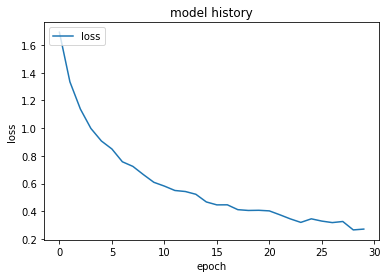

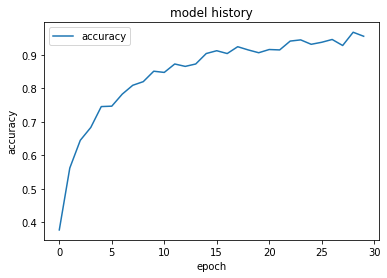

0.32258063554763794
[[ 0  0  0  8  0  5]
 [ 0  0  0 18  0  0]
 [ 0  0  0  5  0  2]
 [ 0  0  0 16  0  5]
 [ 0  0  0  8  0  1]
 [ 0  1  0 10  0 14]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 10ms/step - loss: 1.7134 - accuracy: 0.3381
Epoch 2/30
834/834 [==============================] - 6s 8ms/step - loss: 1.3804 - accuracy: 0.4736
Epoch 3/30
834/834 [==============================] - 6s 8ms/step - loss: 1.1599 - accuracy: 0.6367
Epoch 4/30
834/834 [==============================] - 6s 8ms/step - loss: 1.0130 - accuracy: 0.7026
Epoch 5/30
834/834 [==============================] - 6s 8ms/step - loss: 0.9210 - accuracy: 0.7350
Epoch 6/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8604 - accuracy: 0.7482
Epoch 7/30
834/834 [==============================] - 6s 8ms/step - loss: 0.7790 - accuracy: 0.8010
Epoch 8/30
834/834 [==============================] - 6s 8ms/step - loss: 0.

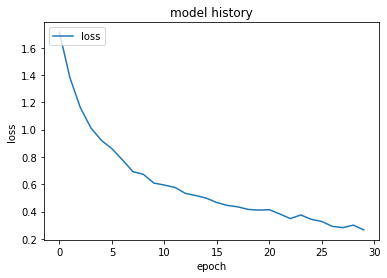

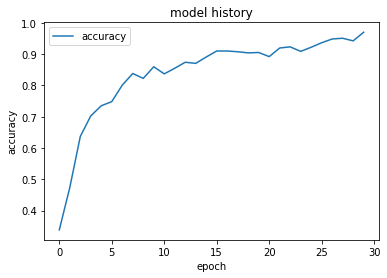

0.3978494703769684
[[ 0  0  0 10  0  4]
 [ 0  0  0 11  0  7]
 [ 0  0  0  5  0  2]
 [ 0  0  0 17  0  4]
 [ 0  0  0  5  1  2]
 [ 0  0  0  5  1 19]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 10ms/step - loss: 1.6829 - accuracy: 0.3321
Epoch 2/30
834/834 [==============================] - 6s 8ms/step - loss: 1.2937 - accuracy: 0.6043
Epoch 3/30
834/834 [==============================] - 6s 8ms/step - loss: 1.1145 - accuracy: 0.6751
Epoch 4/30
834/834 [==============================] - 6s 8ms/step - loss: 0.9767 - accuracy: 0.7122
Epoch 5/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8982 - accuracy: 0.7446
Epoch 6/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8210 - accuracy: 0.7770
Epoch 7/30
834/834 [==============================] - 6s 8ms/step - loss: 0.7458 - accuracy: 0.8022
Epoch 8/30
834/834 [==============================] - 6s 8ms/step - loss: 0.7

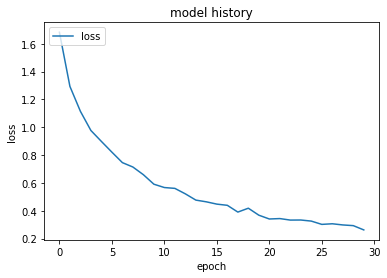

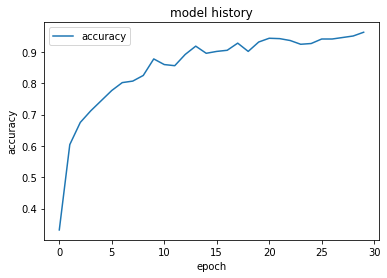

0.3655914068222046
[[ 1  0  1 10  0  2]
 [ 0  0  1  7  1  8]
 [ 1  0  0  5  0  2]
 [ 0  0  0 16  0  5]
 [ 0  0  0  3  1  4]
 [ 0  0  0  8  1 16]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 10ms/step - loss: 1.6489 - accuracy: 0.3681
Epoch 2/30
834/834 [==============================] - 6s 8ms/step - loss: 1.2945 - accuracy: 0.5815
Epoch 3/30
834/834 [==============================] - 6s 8ms/step - loss: 1.1034 - accuracy: 0.6703
Epoch 4/30
834/834 [==============================] - 6s 8ms/step - loss: 1.0117 - accuracy: 0.6906
Epoch 5/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8896 - accuracy: 0.7386
Epoch 6/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8365 - accuracy: 0.7446
Epoch 7/30
834/834 [==============================] - 6s 8ms/step - loss: 0.7449 - accuracy: 0.7746
Epoch 8/30
834/834 [==============================] - 6s 8ms/step - loss: 0.7

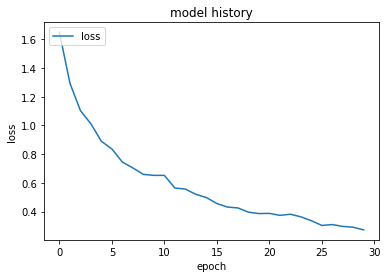

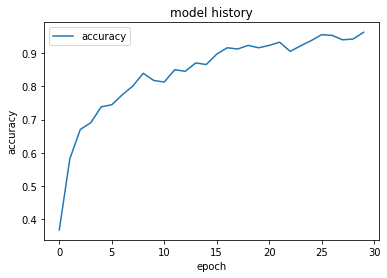

0.3978494703769684
[[ 0  0  0 11  0  3]
 [ 0  0  0 11  0  6]
 [ 0  0  0  3  1  4]
 [ 0  0  0 15  0  6]
 [ 0  0  0  3  1  4]
 [ 0  0  0  4  0 21]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 9ms/step - loss: 1.5904 - accuracy: 0.4089
Epoch 2/30
834/834 [==============================] - 6s 8ms/step - loss: 1.2512 - accuracy: 0.6271
Epoch 3/30
834/834 [==============================] - 6s 8ms/step - loss: 1.0729 - accuracy: 0.6655
Epoch 4/30
834/834 [==============================] - 6s 8ms/step - loss: 0.9399 - accuracy: 0.7338
Epoch 5/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8692 - accuracy: 0.7362
Epoch 6/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8016 - accuracy: 0.7482
Epoch 7/30
834/834 [==============================] - 6s 8ms/step - loss: 0.7494 - accuracy: 0.7878
Epoch 8/30
834/834 [==============================] - 6s 8ms/step - loss: 0.70

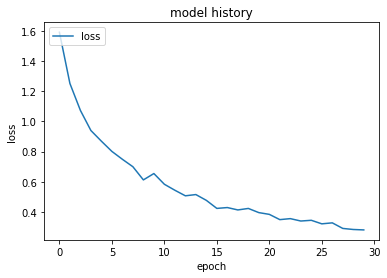

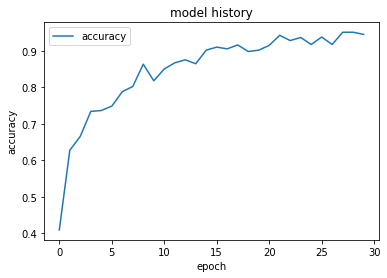

0.32258063554763794
[[ 0  0  0 11  0  3]
 [ 0  0  0  6  2  9]
 [ 0  0  0  1  0  7]
 [ 0  0  0 14  0  7]
 [ 0  0  0  4  0  4]
 [ 0  0  0  8  1 16]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 9ms/step - loss: 1.6418 - accuracy: 0.3717
Epoch 2/30
834/834 [==============================] - 6s 8ms/step - loss: 1.2846 - accuracy: 0.5935
Epoch 3/30
834/834 [==============================] - 6s 8ms/step - loss: 1.0818 - accuracy: 0.6523
Epoch 4/30
834/834 [==============================] - 6s 8ms/step - loss: 0.9440 - accuracy: 0.7266
Epoch 5/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8876 - accuracy: 0.7278
Epoch 6/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8066 - accuracy: 0.7530
Epoch 7/30
834/834 [==============================] - 6s 8ms/step - loss: 0.7536 - accuracy: 0.8010
Epoch 8/30
834/834 [==============================] - 6s 8ms/step - loss: 0.6

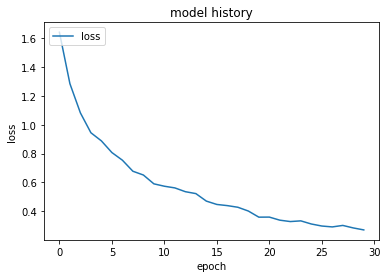

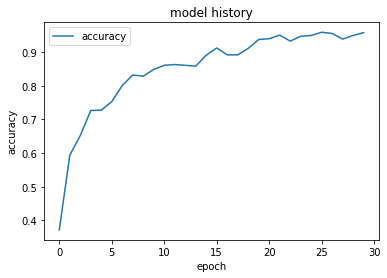

0.32258063554763794
[[ 0  0  0 14  0  0]
 [ 0  0  0 17  0  1]
 [ 0  0  0  7  0  1]
 [ 0  0  0 19  0  2]
 [ 0  0  0  7  0  1]
 [ 0  0  0 13  0 11]]
---------------------------------------------------------------------------
Epoch 1/30
834/834 [==============================] - 8s 10ms/step - loss: 1.6178 - accuracy: 0.3405
Epoch 2/30
834/834 [==============================] - 6s 8ms/step - loss: 1.2867 - accuracy: 0.5635
Epoch 3/30
834/834 [==============================] - 6s 8ms/step - loss: 1.1075 - accuracy: 0.6343
Epoch 4/30
834/834 [==============================] - 6s 8ms/step - loss: 0.9909 - accuracy: 0.6715
Epoch 5/30
834/834 [==============================] - 6s 8ms/step - loss: 0.8720 - accuracy: 0.7566
Epoch 6/30
834/834 [==============================] - 6s 8ms/step - loss: 0.7822 - accuracy: 0.7890
Epoch 7/30
834/834 [==============================] - 6s 8ms/step - loss: 0.7079 - accuracy: 0.8070
Epoch 8/30
834/834 [==============================] - 6s 8ms/step - loss: 0.

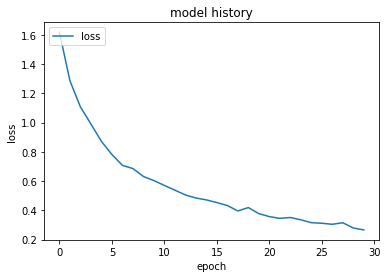

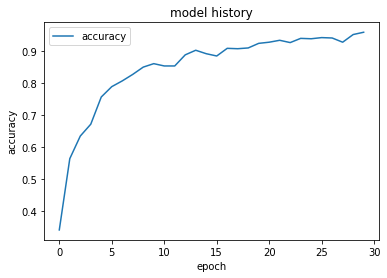

0.3333333432674408
[[ 0  0  0 10  1  2]
 [ 0  0  0 16  0  2]
 [ 0  0  0  6  0  2]
 [ 0  0  0 16  0  5]
 [ 0  0  0  5  1  2]
 [ 0  0  0 10  1 14]]
---------------------------------------------------------------------------
Epoch 1/30
835/835 [==============================] - 9s 11ms/step - loss: 1.6396 - accuracy: 0.3784
Epoch 2/30
835/835 [==============================] - 6s 8ms/step - loss: 1.3125 - accuracy: 0.5581
Epoch 3/30
835/835 [==============================] - 6s 8ms/step - loss: 1.1371 - accuracy: 0.6335
Epoch 4/30
835/835 [==============================] - 6s 8ms/step - loss: 0.9808 - accuracy: 0.7018
Epoch 5/30
835/835 [==============================] - 6s 8ms/step - loss: 0.9470 - accuracy: 0.6958
Epoch 6/30
835/835 [==============================] - 6s 8ms/step - loss: 0.8646 - accuracy: 0.7114
Epoch 7/30
835/835 [==============================] - 6s 8ms/step - loss: 0.7634 - accuracy: 0.7772
Epoch 8/30
835/835 [==============================] - 6s 8ms/step - loss: 0.7

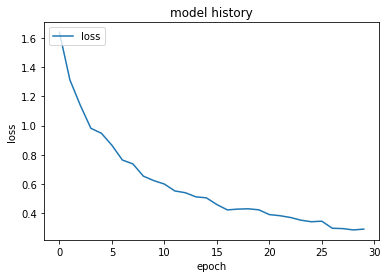

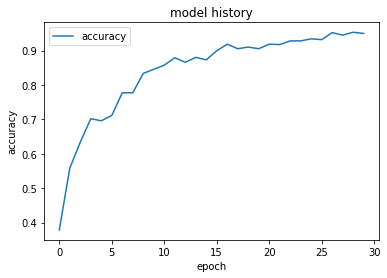

0.3695652186870575
[[ 0  0  0 12  0  1]
 [ 0  0  0 17  0  1]
 [ 0  0  0  6  0  1]
 [ 0  0  0 20  0  0]
 [ 0  1  0  7  0  1]
 [ 0  0  0 11  0 14]]
---------------------------------------------------------------------------
Epoch 1/30
835/835 [==============================] - 8s 9ms/step - loss: 1.6085 - accuracy: 0.3772
Epoch 2/30
835/835 [==============================] - 6s 8ms/step - loss: 1.3044 - accuracy: 0.5497
Epoch 3/30
835/835 [==============================] - 6s 8ms/step - loss: 1.1090 - accuracy: 0.6754
Epoch 4/30
835/835 [==============================] - 6s 8ms/step - loss: 0.9831 - accuracy: 0.7246
Epoch 5/30
835/835 [==============================] - 6s 8ms/step - loss: 0.8780 - accuracy: 0.7557
Epoch 6/30
835/835 [==============================] - 6s 8ms/step - loss: 0.8012 - accuracy: 0.7689
Epoch 7/30
835/835 [==============================] - 6s 8ms/step - loss: 0.7706 - accuracy: 0.7725
Epoch 8/30
835/835 [==============================] - 6s 8ms/step - loss: 0.66

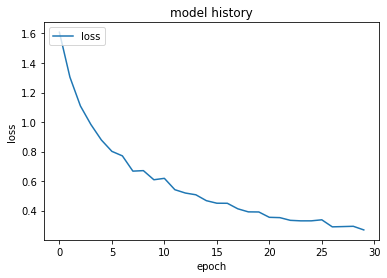

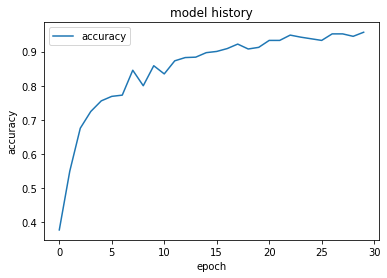

0.3586956560611725
[[ 0  0  1 10  0  2]
 [ 0  0  0 10  0  8]
 [ 0  0  0  2  0  5]
 [ 0  0  2 10  0  8]
 [ 0  0  0  5  0  4]
 [ 0  0  0  2  0 23]]
---------------------------------------------------------------------------
Epoch 1/30
835/835 [==============================] - 8s 10ms/step - loss: 1.6699 - accuracy: 0.3665
Epoch 2/30
835/835 [==============================] - 6s 8ms/step - loss: 1.3268 - accuracy: 0.5689
Epoch 3/30
835/835 [==============================] - 6s 8ms/step - loss: 1.1418 - accuracy: 0.6407
Epoch 4/30
835/835 [==============================] - 6s 8ms/step - loss: 0.9792 - accuracy: 0.7389
Epoch 5/30
835/835 [==============================] - 6s 8ms/step - loss: 0.8989 - accuracy: 0.7413
Epoch 6/30
835/835 [==============================] - 6s 8ms/step - loss: 0.8703 - accuracy: 0.7425
Epoch 7/30
835/835 [==============================] - 6s 8ms/step - loss: 0.7466 - accuracy: 0.7976
Epoch 8/30
835/835 [==============================] - 6s 8ms/step - loss: 0.7

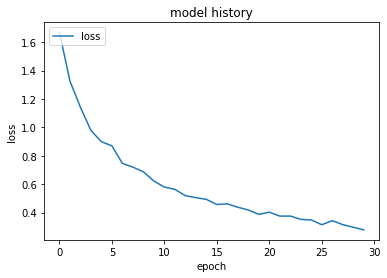

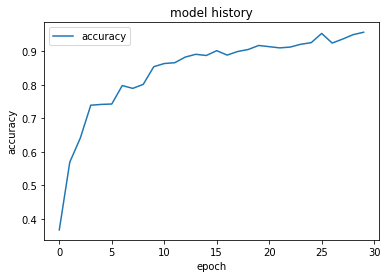

0.3695652186870575
[[ 0  0  0 12  0  1]
 [ 0  0  0 15  0  3]
 [ 0  0  0  5  0  2]
 [ 0  0  0 18  0  2]
 [ 0  0  0  7  0  2]
 [ 0  0  0  9  0 16]]
---------------------------------------------------------------------------


In [13]:
prediction=[]
confusion_list=[]
num_classes = 6
for train_index, test_index in skf.split(img_x,labels):
    x_train, x_test = img_x[train_index,:,:,:], img_x[test_index,:,:,:]
    y_train, y_test = labels[train_index], labels[test_index]
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("---------------------------------------------------------------------------")

In [14]:
print(prediction)

[0.32258063554763794, 0.3978494703769684, 0.3655914068222046, 0.3978494703769684, 0.32258063554763794, 0.32258063554763794, 0.3333333432674408, 0.3695652186870575, 0.3586956560611725, 0.3695652186870575]
